# **Google playstore Data**
**Complete Exploratory Data Analysis**

## About Dataset

>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/lava18/google-play-store-apps/)

- `Context`
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

- `Content`
Each app (row) has values for catergory, rating, size, and more.

- `Acknowledgements`
This information is scraped from the Google Play Store. This app information would not be available without it.

- `Inspiration`
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline

## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [2]:
df = pd.read_csv('googleplaystore.csv')

- Viewing the first five Rows of the data

In [3]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


 **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands:


In [4]:
#set option to be maximum for rows and columns
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe
# hide all warnings
import warnings
warnings.filterwarnings('ignore')

- let's see the exact column names which can be easily copied later on from Google Playstore Dataset

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

 Let's have a look on the shape of the dataset.

In [6]:
df.shape

(10841, 13)

In [7]:
#print the number of rows in the DataFrame df.
print(f"the number of rows {df.shape[0]}")

the number of rows 10841


In [8]:
print(f"the number of columns are {df.shape[1]}")

the number of columns are 13


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# **Observations**
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   - `'Size', 'Installs', 'Price'`

In [10]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


## Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type (according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let's clean the `Size` column first

In [11]:
# how to make a size numeric column
df['Size'].value_counts()

Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
2.8M                    65
3.4M                    65
32M                     63
34M                     63
3.7M                    63
3.9M                    62
3.8M                    62
4

In [12]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

## Observation:

1. "veries with device"
2. M
3. k

In [13]:
# check for null values
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [14]:
df['Size'].isnull().sum()

0

no missing value in size we are good to go.

verify the number of values and 3 different kind of value

In [15]:
# fint the values having M in them 
df['Size'].loc[df['Size'].str.contains('M')]. value_counts()

11M      198
12M      196
14M      194
13M      191
15M      184
17M      160
19M      154
16M      149
26M      149
25M      143
20M      139
21M      138
10M      136
24M      136
18M      133
23M      117
22M      114
29M      103
27M       97
28M       95
30M       84
33M       79
3.3M      77
37M       76
35M       72
31M       70
2.9M      69
2.3M      68
2.5M      68
3.4M      65
2.8M      65
34M       63
32M       63
3.7M      63
40M       62
3.8M      62
3.0M      62
3.9M      62
4.0M      61
44M       61
36M       60
4.2M      59
48M       59
46M       59
5.0M      58
3.6M      57
39M       56
3.1M      56
3.2M      55
38M       55
4.3M      54
2.7M      53
4.1M      52
2.0M      51
5.4M      51
3.5M      51
4.9M      50
1.8M      50
2.6M      50
5.7M      48
1.5M      48
41M       48
2.4M      48
43M       47
4.6M      46
49M       45
2.2M      45
6.3M      45
5.3M      44
50M       44
5.1M      43
53M       43
4.4M      42
63M       41
1.2M      41
42M       41
45M       40

In [16]:
 #fint the values having M in them and its sum
df['Size'].loc[df['Size'].str.contains('M')]. value_counts().sum()

8830

In [17]:
# fint the values having k in them 
df['Size'].loc[df['Size'].str.contains('k')]. value_counts()

201k     3
79k      3
118k     3
375k     3
266k     3
656k     2
196k     2
592k     2
51k      2
26k      2
364k     2
192k     2
17k      2
72k      2
335k     2
318k     2
228k     2
417k     2
842k     2
33k      2
70k      2
957k     2
473k     2
172k     2
206k     2
58k      2
141k     2
948k     2
18k      2
334k     2
704k     2
29k      2
323k     2
103k     1
601k     1
221k     1
153k     1
116k     1
108k     1
940k     1
743k     1
898k     1
176k     1
28k      1
629k     1
663k     1
288k     1
34k      1
942k     1
259k     1
164k     1
551k     1
458k     1
245k     1
514k     1
400k     1
801k     1
209k     1
787k     1
237k     1
50k      1
411k     1
122k     1
643k     1
809k     1
597k     1
173k     1
986k     1
97k      1
516k     1
837k     1
785k     1
780k     1
961k     1
269k     1
499k     1
20k      1
498k     1
600k     1
749k     1
353k     1
642k     1
881k     1
775k     1
608k     1
636k     1
470k     1
170k     1
160k     1
144k     1
143k     1

In [18]:
# find the values in size column which has 'k' in it
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

316

In [19]:
# find the values in size column which has 'Varies with device' in them 
df['Size'].loc[df['Size'].str.contains('Varies with device')]. value_counts()

Varies with device    1695
Name: Size, dtype: int64

In [20]:
# find the values in size column which has 'Varies with device' in them 
df['Size'].loc[df['Size'].str.contains('Varies with device')]. value_counts().sum()

1695

In [21]:
#sum of M,K, and Varies with device
8830+316+1695

10841

In [22]:
len(df)

10841

- We have `8830` values in `M` units
- We have `316` values in `k` units
- We have `1695` value in `Varies with device` 

> Let's convert the `M` and `K` units into bytes and then remove the `M` and `K` from the values and convert them into numeric data type.  

In [23]:
# convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric
def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''
    
    if isinstance(size, str):
        if 'k' in size:
            return float(size.replace('k', '')) * 1024
        elif 'M' in size:
            return float(size.replace('M', '')) * 1024 * 1024
        elif 'Varies with device' in size:
            return np.nan
    return size

df['Size'] = df['Size'].apply(convert_size)

In [24]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [25]:
# rename the column name 'Size' to 'Size_in_bytes'
df.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [26]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [27]:
# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024))

In [28]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8


In [29]:
# making a new column called 'Size in Mb' which will have the size in MB
df['Size_in_kb'] = df['Size_in_bytes'].apply(lambda x: x/(1024))

In [30]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0,19456.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0,14336.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7,8908.8
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0,25600.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8,2867.2


In [31]:
#Drop Column "Size_in_kb" from Data set
df = df.drop("Size_in_kb", axis=1)

In [32]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8


- Now we have converted every value into bytes and removed the `M` and `K` from the values and converted them into numeric data type.
- 'Varies with device' was a string value, therefore we intentionally converted them into null values, which we can fill later on according to our needs.

---
- Let's have a look on the `Installs` column

###  Unique:

In [33]:
# check the unique values in size column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

###  VALUE_COUNT:

In [34]:
# let's have a values counts
df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

###  NULL & SUM:

In [35]:
df['Installs'].isnull().sum()

0

### Install column: 
 1. Remove + sign
 2. Remmove,
 3. Convert The column into an integer


In [36]:
# find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()


10840

In [37]:
# find how many values has ',' in it
df['Installs'].loc[df['Installs'].str.contains(',')].value_counts().sum()

9037

In [38]:
# for "+ sign"
df['Installs'] = df['Installs'].apply(lambda x : x.replace('+',"") if '+' in str(x) else x)

In [39]:
df['Installs'].value_counts()

1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             908
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Name: Installs, dtype: int64

In [40]:
# for ", "
df['Installs'] = df['Installs'].apply(lambda x : x.replace(',',"") if ',' in str(x) else x)

In [41]:
df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [42]:
# for integer
df['Installs'] = df['Installs'].apply(lambda x : int(x))

In [43]:
df['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [44]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,100.000000


In [45]:
df['Installs'].max()

1000000000

In [46]:
# making a new column called 'Installs_category' which will have the category of the installs
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 10000000000]
labels=['no', 'Very low', 'Low', 'Moderate', 'More than moderate', 'High', 'Very High', 'Top Notch']
df['Installs_category'] = pd.cut(df['Installs'], bins=bins, labels=labels)

In [47]:
df['Installs_category'].value_counts()
 # check the value counts of the new column

Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: Installs_category, dtype: int64

In [48]:
# this will show the data type of the column
df['Installs'].dtype

dtype('int64')

### price column:

In [49]:
df['Price'].describe()

count     10841
unique       92
top           0
freq      10041
Name: Price, dtype: object

In [50]:
df['Price'].value_counts()

0           10041
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$1.96           1
$19.40          1
$4.80           1
$3.28           1
$4.59           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$2.59           1
$3.90           1
$154.99         1
$4.60           1
$28.99          1
$2.95           1
$2.90           1
$1.97     

In [51]:
# check the unique values in the 'Price' column
df['Price'].unique()

array(['0', '$4.99 ', '$3.99 ', '$6.99 ', '$1.49 ', '$2.99 ', '$7.99 ',
       '$5.99 ', '$3.49 ', '$1.99 ', '$9.99 ', '$7.49 ', '$0.99 ',
       '$9.00 ', '$5.49 ', '$10.00 ', '$24.99 ', '$11.99 ', '$79.99 ',
       '$16.99 ', '$14.99 ', '$1.00 ', '$29.99 ', '$12.99 ', '$2.49 ',
       '$10.99 ', '$1.50 ', '$19.99 ', '$15.99 ', '$33.99 ', '$74.99 ',
       '$39.99 ', '$3.95 ', '$4.49 ', '$1.70 ', '$8.99 ', '$2.00 ',
       '$3.88 ', '$25.99 ', '$399.99 ', '$17.99 ', '$400.00 ', '$3.02 ',
       '$1.76 ', '$4.84 ', '$4.77 ', '$1.61 ', '$2.50 ', '$1.59 ',
       '$6.49 ', '$1.29 ', '$5.00 ', '$13.99 ', '$299.99 ', '$379.99 ',
       '$37.99 ', '$18.99 ', '$389.99 ', '$19.90 ', '$8.49 ', '$1.75 ',
       '$14.00 ', '$4.85 ', '$46.99 ', '$109.99 ', '$154.99 ', '$3.08 ',
       '$2.59 ', '$4.80 ', '$1.96 ', '$19.40 ', '$3.90 ', '$4.59 ',
       '$15.46 ', '$3.04 ', '$4.29 ', '$2.60 ', '$3.28 ', '$4.60 ',
       '$28.99 ', '$2.95 ', '$2.90 ', '$1.97 ', '$200.00 ', '$89.99 ',
       '$2.56 '

In [52]:
df['Price'].isnull().sum()

0

In [53]:
# how mainy values have $ sign
df['Price'].loc[df['Price'].str.contains('$')].value_counts()

0           10041
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$1.96           1
$19.40          1
$4.80           1
$3.28           1
$4.59           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$2.59           1
$3.90           1
$154.99         1
$4.60           1
$28.99          1
$2.95           1
$2.90           1
$1.97     

In [54]:
df['Price'].loc[df['Price'].str.contains('$')].value_counts().sum() # its not true

10841

In [55]:
 df['Price'].loc[df['Price'].str.contains( '\$')].value_counts().sum() # $ sign available 

800

In [56]:
# This code counts the number of values in the 'Price' column which contains 0 but does not contain $ sign
df['Price'].loc[(df['Price'].str.contains('0')) & (~df['Price'].str.contains('\$'))].value_counts().sum()

10041

In [57]:
# for remove $ sign 
df['Price'] = df['Price'].apply(lambda x : x.replace('$',"") if '$' in str(x) else x)

In [58]:
df['Price'].value_counts()

0          10041
0.99         148
2.99         129
1.99          73
4.99          72
3.99          63
1.49          46
5.99          30
2.49          26
9.99          21
6.99          13
399.99        12
14.99         11
4.49           9
29.99          7
24.99          7
3.49           7
7.99           7
5.49           6
19.99          6
11.99          5
6.49           5
12.99          5
8.99           5
10.00          3
16.99          3
1.00           3
2.00           3
13.99          2
8.49           2
17.99          2
1.70           2
3.95           2
79.99          2
7.49           2
9.00           2
10.99          2
39.99          2
33.99          2
1.96           1
19.40          1
4.80           1
3.28           1
4.59           1
15.46          1
3.04           1
4.29           1
2.60           1
2.59           1
3.90           1
154.99         1
4.60           1
28.99          1
2.95           1
2.90           1
1.97           1
200.00         1
89.99          1
2.56          

In [59]:
# now converted into a numeric value
df['Price'] = df['Price'].apply(lambda x : float(x)) # price is in conteneous value

In [60]:
df['Price'].value_counts()

0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.61    

In [61]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [62]:
# using f string to print the min, max and average price of the apps
print(f"Min price is: {df['Price'].min()} $")
print(f"Max price is: {df['Price'].max()} $")
print(f"Average price is: {df['Price'].mean()} $")

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0272733142699015 $


### **2.1. Descriptive Statistics**:

In [63]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


## Observations:
---
- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypotheses.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `4.19` which is a good rating. On an average people give this rating.
- We can see that the `Reviews` column has a minimum value of `0` and a maximum value of `78,158,306` 78+ Millions, which is the range of reviews, and the mean is `444,111.93` which is a good number of reviews. On an average people give this number of reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

But even before that we have to think about the missing values in the dataset.
---

## **2.2. Dealing with the missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get the correct insights from the data.

## Where to Learn more about Missing Values?
In the following blog [Missing Values k Rolay](https://codanics.com/missing-values-k-rolay/) you will understand how missing values can change your output if you ignore them and how to deal with them.

## Missing values inside the dataframe:

In [64]:
 # this will show the number of null values in each column
df.isnull().sum()

App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Installs_category       0
dtype: int64

In [65]:
# find missing values
# this will show the number of null values in each column in descending order
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [66]:
# this will show the total number of null values in the dataframe
df.isnull().sum().sum()

4877

In [67]:
 # this will show the percentage of null values in each column( false) 
round(df.isnull().sum() / len(df) * 100 ,2).sort_values(ascending =  False)

Size_in_bytes        15.64
Size_in_Mb           15.64
Rating               13.60
Current Ver           0.07
Android Ver           0.02
Category              0.01
Type                  0.01
Genres                0.01
App                   0.00
Reviews               0.00
Installs              0.00
Price                 0.00
Content Rating        0.00
Last Updated          0.00
Installs_category     0.00
dtype: float64

- Let's plot the missing values in the dataset

<AxesSubplot: >

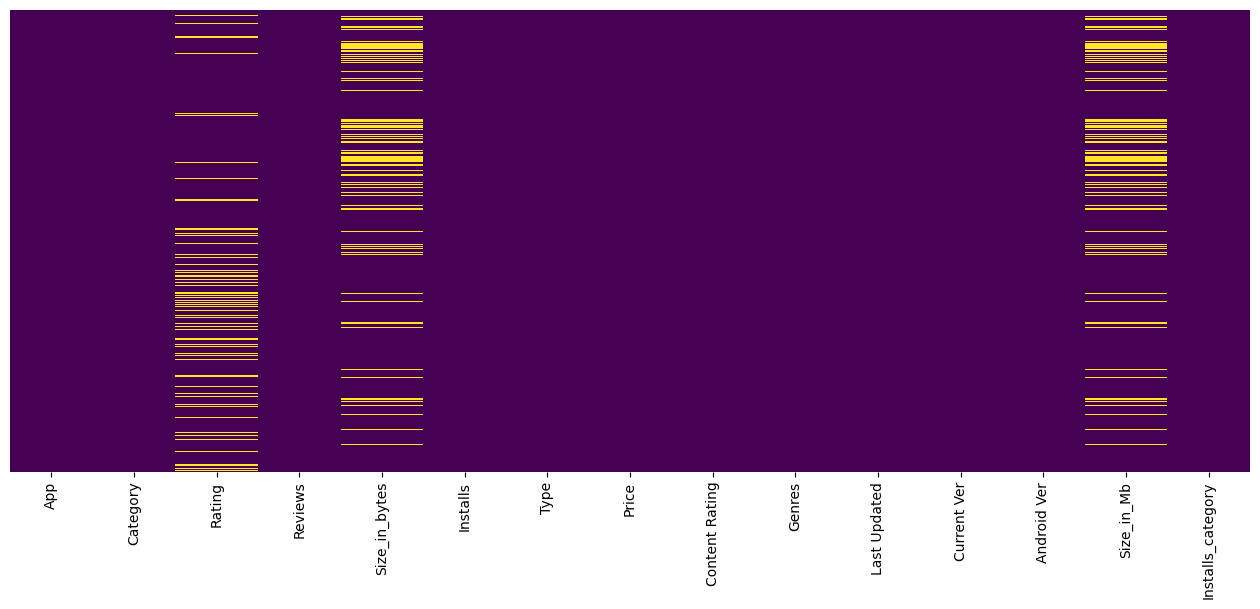

In [68]:
# plot missing values
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels = False , cbar=False, cmap='viridis')

- There is another way, let's plot the missing values 

Text(0.5, 1.0, 'Percentage of Missing Values in each Column')

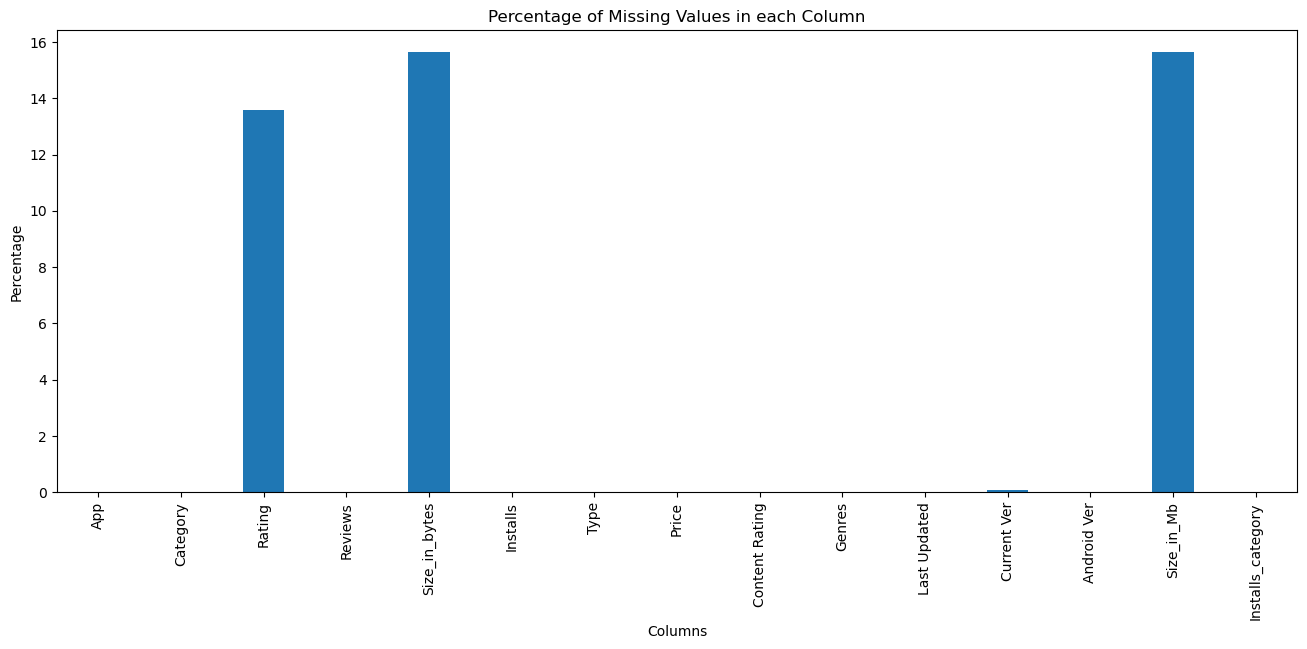

In [69]:
# make figure size on percentage:
plt.figure(figsize=(16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
# add the labels
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of Missing Values in each Column')

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

Text(0.5, 1.0, 'Percentage of Missing Values in each Column without Rating column')

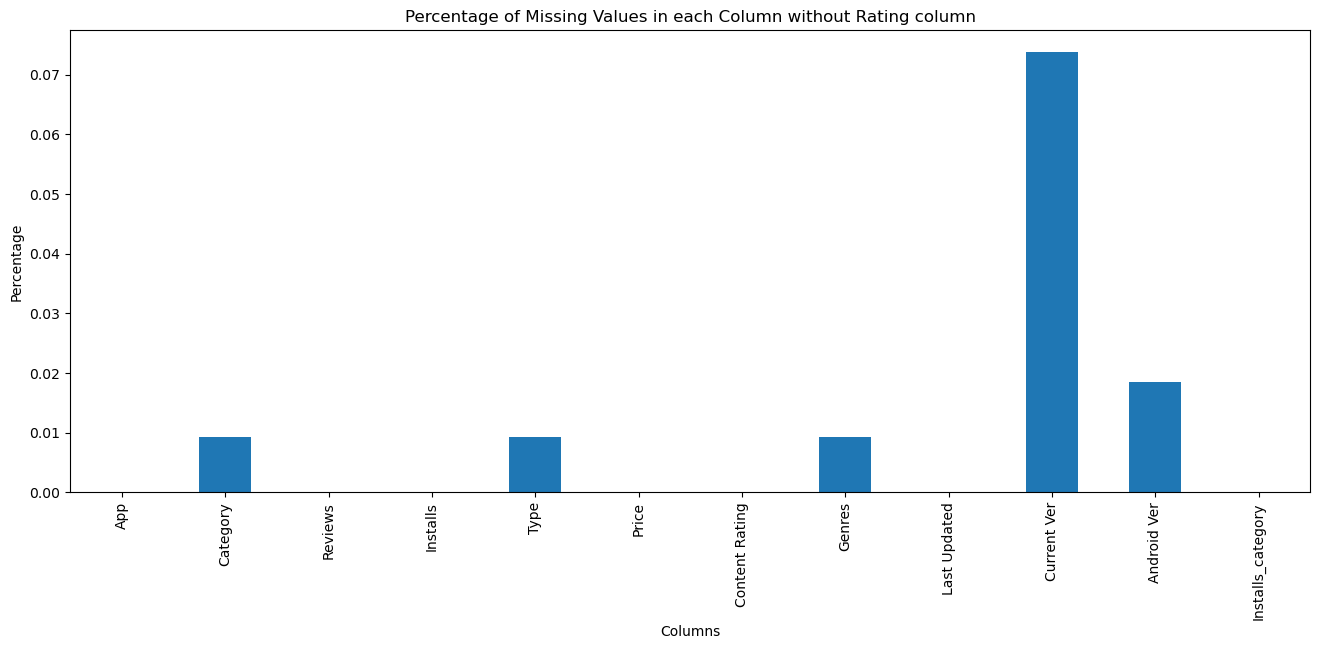

In [70]:
plt.figure(figsize=(16, 6)) # make figure size
missing_percentage[missing_percentage < 1].plot(kind='bar') # plot the null values by their percentage in each column
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title('Percentage of Missing Values in each Column without Rating column')  # add the title for the plot

<AxesSubplot: >

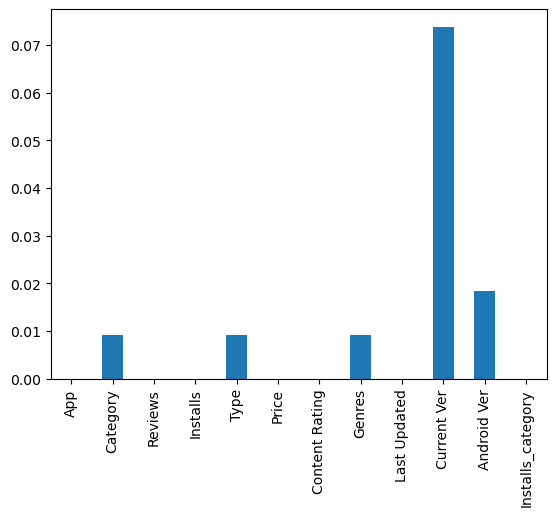

In [71]:
missing_percentage[missing_percentage < 1].plot(kind='bar')

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as follows:

In [72]:
#this will show the numbers of null values
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Category                1
Type                    1
Genres                  1
App                     0
Reviews                 0
Installs                0
Price                   0
Content Rating          0
Last Updated            0
Installs_category       0
dtype: int64

In [73]:
(df.isnull().sum() / len(df) * 100).sort_values(ascending=False)


Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Category              0.009224
Type                  0.009224
Genres                0.009224
App                   0.000000
Reviews               0.000000
Installs              0.000000
Price                 0.000000
Content Rating        0.000000
Last Updated          0.000000
Installs_category     0.000000
dtype: float64

## Observations:
---
- We have 1695 missing values in the `'Size_in_bytes'` and `'Size_in_Mb'` columns, which is 15.6% of the total values in the column.
- We have 1474 missing values in the `'Rating'` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `'Current Ver'` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `'Android Ver'` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category`, `Type` and `Genres` columns, which is 0.009% of the total values in the column.

### **2.3. Dealing with the missing values**
- We can not impute the `Rating` column as is is directly linked with the instalypolation column. To test this Hthesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---

- Let's run the correlations

In [74]:
df.describe() # these are numeric columns

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<AxesSubplot: >

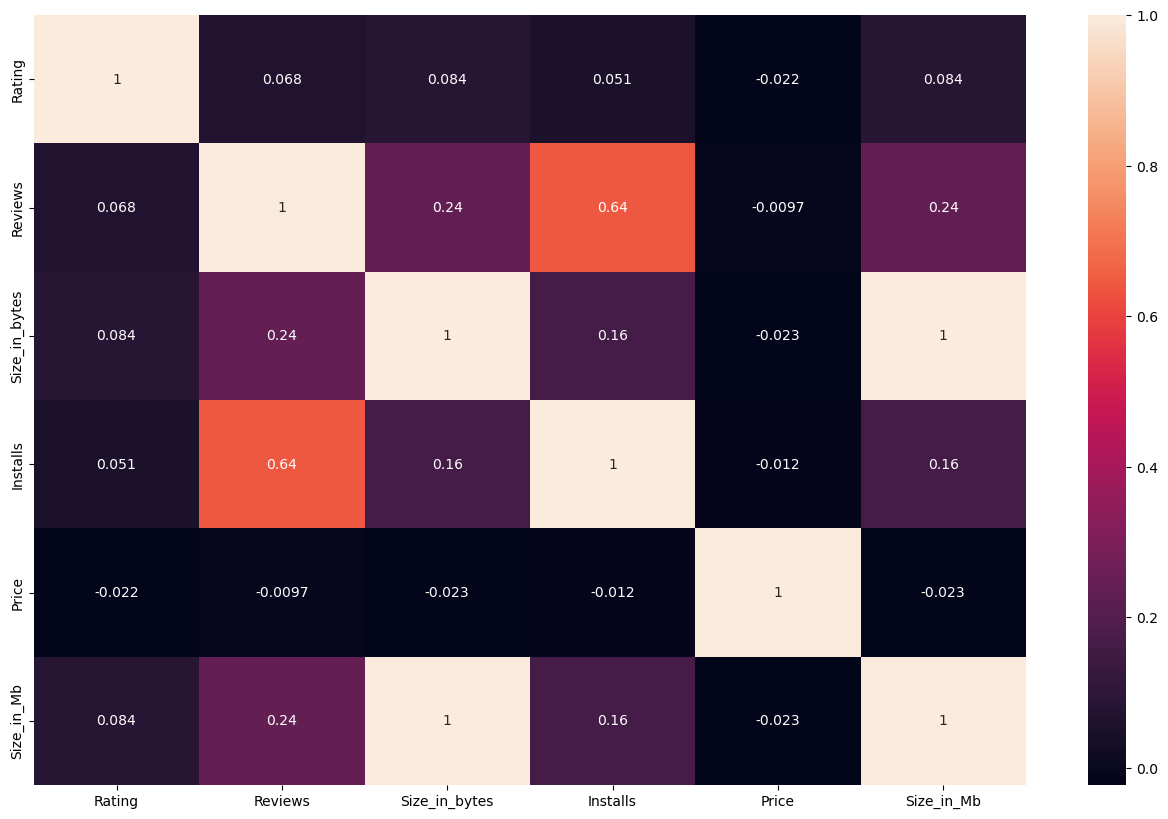

In [75]:
# Make a correlation matrix of numeric columns
plt.figure(figsize=(16, 10)) # make figure size  
numeric_cols = ['Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb'] # make a list of numeric columns
sns.heatmap(df[numeric_cols].corr(), annot=True) # plot thmatrixe correlation

## correlations by pandas

In [76]:
# we can also calculate the correlation matrix using pandas
df[numeric_cols].corr() # this will show the correlation matrix

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [77]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

# this is to install scipy if you have not done it before
# pip install scipy 
from scipy import stats

# remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f"Pearson's R between Reviews and Installs: {pearson_r:.4f}")

Pearson's R between Reviews and Installs: 0.6262


---
## Observations
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is `0.64` according to corr(). Which is quite good.
  - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
    - If we have an ap with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb` or `Size_in_bytes` , which is `0.16`, this also shows us the importance of size and Installs. But we can not depend on it as the Peason correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns, as they are very less in number and will not affect our analysis.


---
### length before removing null values-

In [78]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10841


In [79]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
df.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [80]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(df)}")

Length of the dataframe after removing null values: 10829


- We have removed `12` rows having null values in the `Current Ver`, `Android Ver`, `Category`, `Type` and `Genres` columns:

In [81]:
# let's check the null values again
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
App                     0
Category                0
Reviews                 0
Installs                0
Type                    0
Price                   0
Content Rating          0
Genres                  0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

---
## **Observations**
- Only `Rating` and `Size_in_bytes` or `Size_in_Mb` columns are left with missing values.
  - We know that we have to be carefull while deadling with `Rating` column, as it is directly linked with the `Installs` column.
  - In Size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
  ---

In [82]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [83]:
# use groupby function to find the trend of Rating in each Installs_category
df.groupby('Installs_category')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


####  Assignment:


To replace the missing values of 'Rating' with the respective average rating within each 'Installs_category,'

In [84]:
# Calculate the average rating for each 'Installs_category'
average_ratings = df.groupby('Installs_category')['Rating'].mean()

# Fill missing 'Rating' values with the respective average within each 'Installs_category'
df['Rating'] = df.apply(lambda row: average_ratings[row['Installs_category']] if pd.isna(row['Rating']) else row['Rating'], axis=1)


In [85]:
df['Rating'].isnull().sum()

14

Text(7, 3.5, 'Null values: 0')

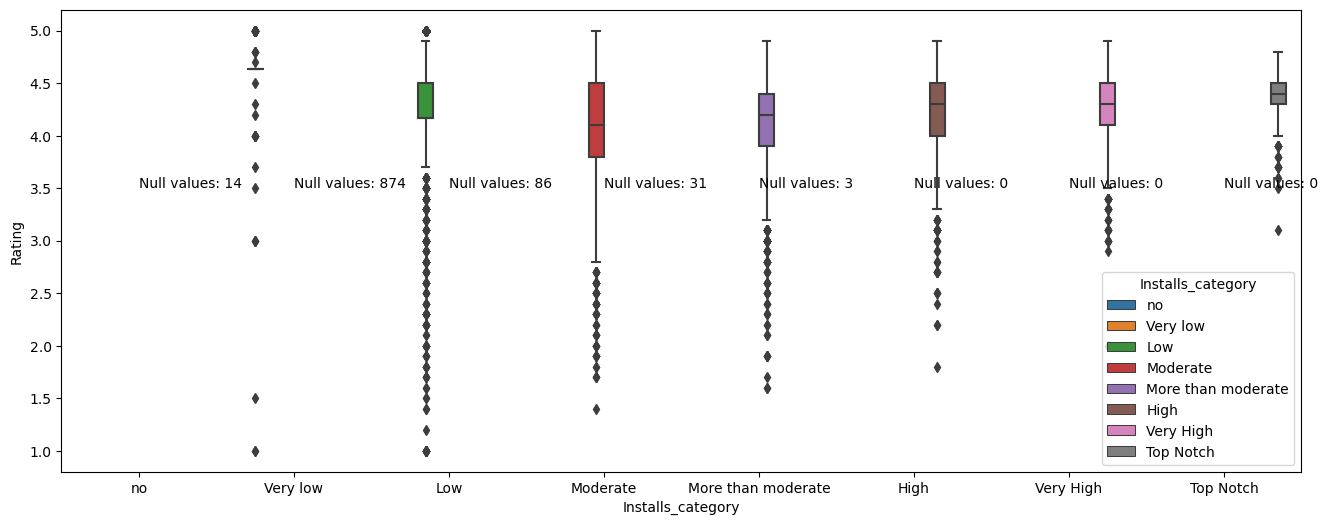

In [86]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y='Rating', hue='Installs_category', data=df) # plot the boxplot
# add the text of number of null values in each category
plt.text(0, 3.5, 'Null values: 14')
plt.text(1, 3.5, 'Null values: 874')
plt.text(2, 3.5, 'Null values: 86')
plt.text(3, 3.5, 'Null values: 31')
plt.text(4, 3.5, 'Null values: 3')
plt.text(5, 3.5, 'Null values: 0')
plt.text(6, 3.5, 'Null values: 0')
plt.text(7, 3.5, 'Null values: 0')

- Let's check if there is any similar link with Reviews as well:

In [87]:
# in which Install_category the Rating has NaN values
df['Installs_category'].loc[df['Reviews'].isnull()].value_counts()

no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: Installs_category, dtype: int64

- There are no Null values in Reviews:

<AxesSubplot: xlabel='Installs_category', ylabel='Reviews'>

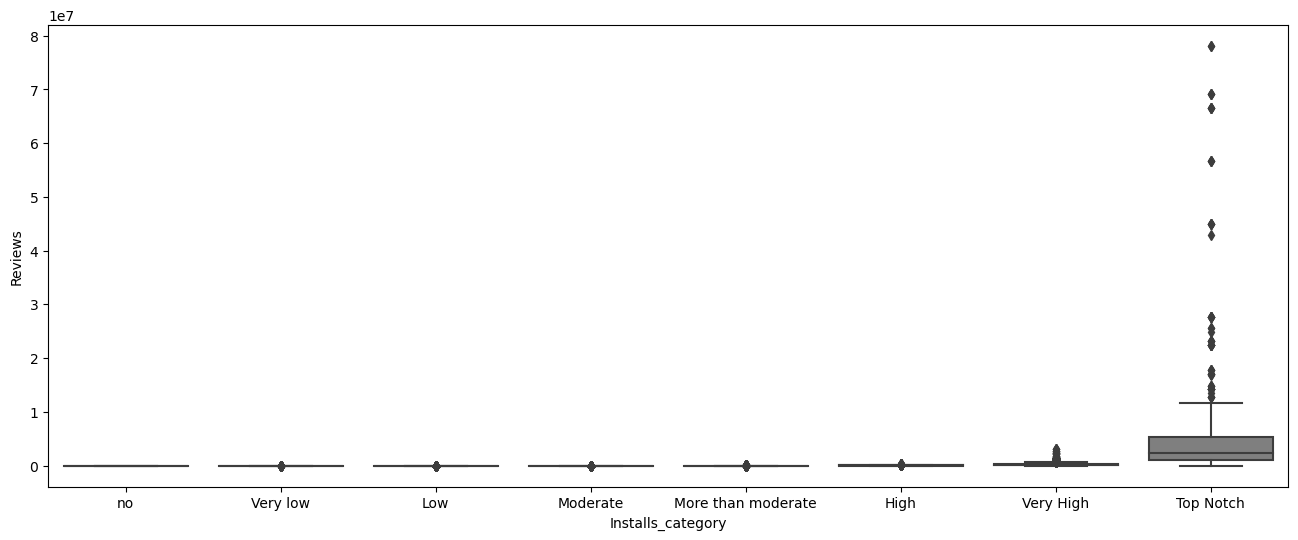

In [88]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= 'Reviews', data=df) # plot the boxplot

- The data looks really imbalance, let's normalize the data using log transformation:

<AxesSubplot: xlabel='Installs_category', ylabel='Reviews'>

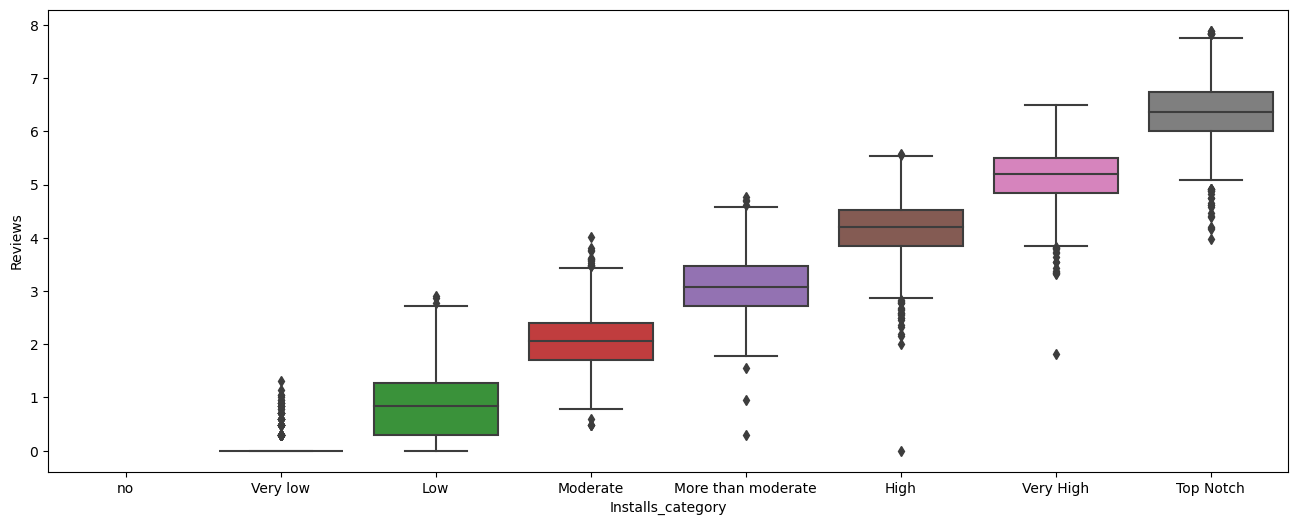

In [89]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize=(16, 6)) # make figure size
sns.boxplot(x='Installs_category', y= np.log10(df['Reviews']), data=df) # plot the boxplot

- We also draw the scatter plot of the `Rating` and `Review` columns with the `Installs` column:

<AxesSubplot: xlabel='Rating', ylabel='Reviews'>

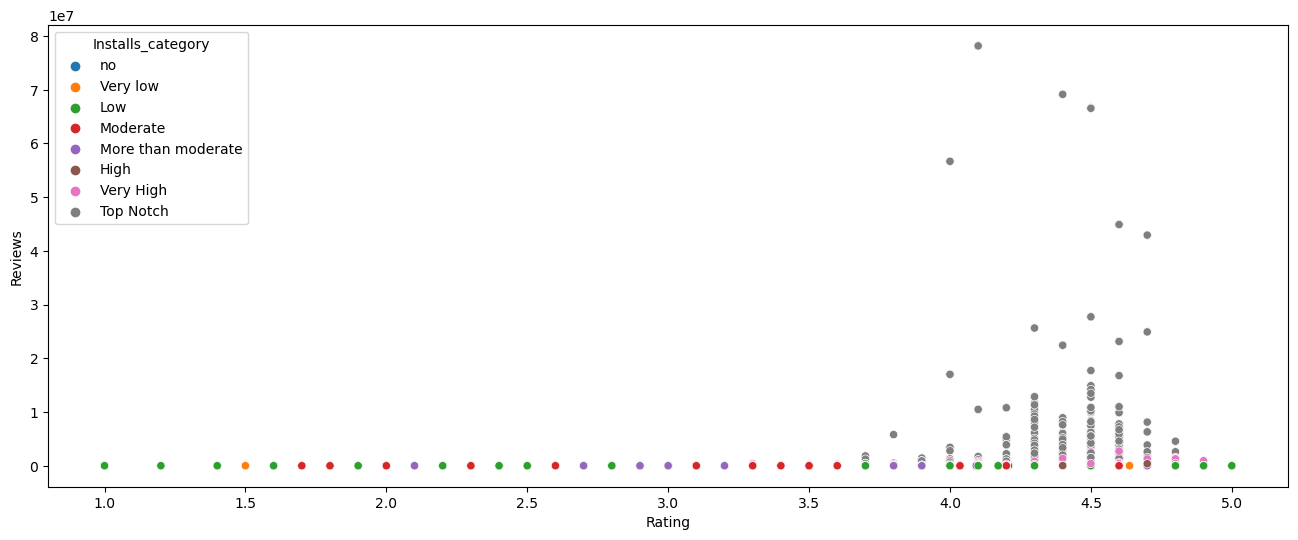

In [90]:
# Draw a scatter plot between Rating, Reviews and Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Rating', y='Reviews', hue='Installs_category', data=df) # plot the scatter plot

- It doesn't show any trend, because, you should know that Rating is a categorical variable (Ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs:

<AxesSubplot: xlabel='Reviews', ylabel='Installs'>

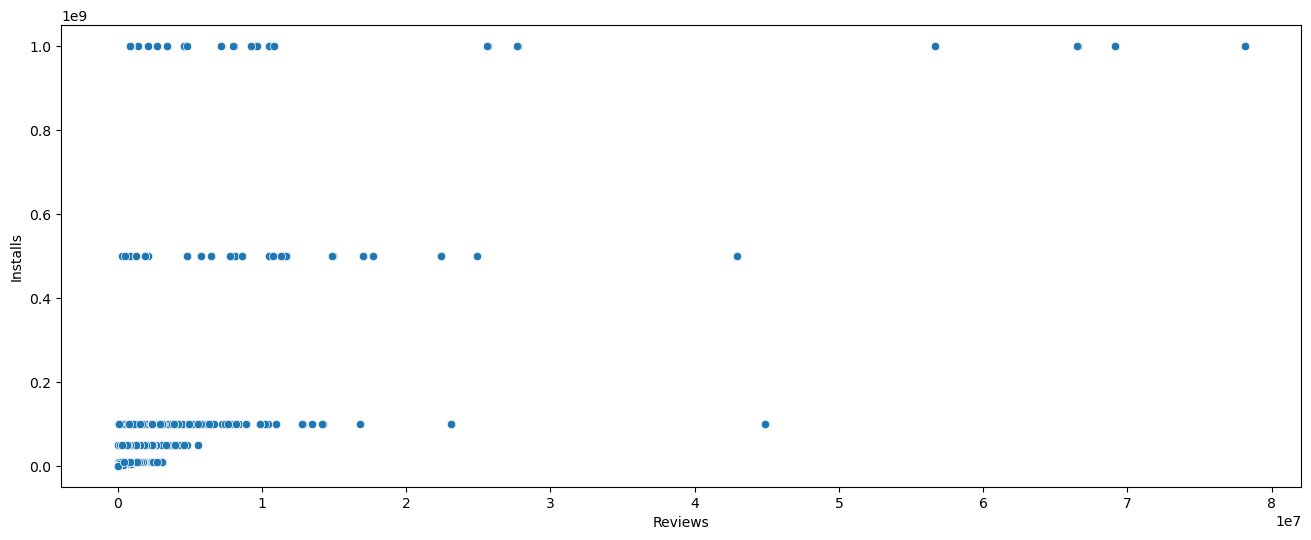

In [91]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Reviews', y='Installs', data=df) # plot the scatter plot

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation:

<AxesSubplot: xlabel='Reviews', ylabel='Installs'>

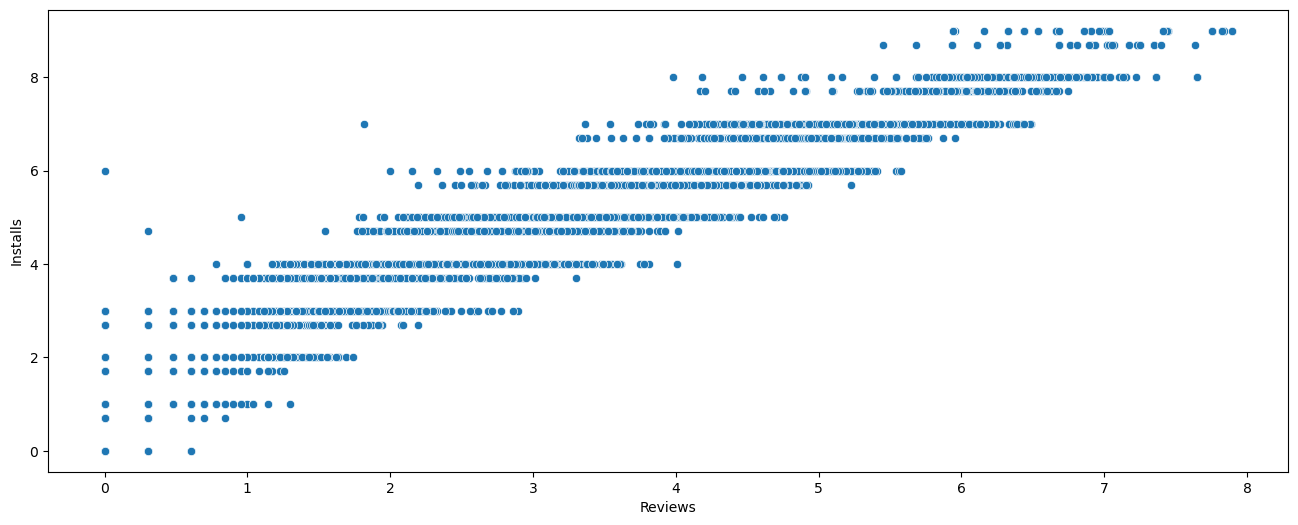

In [92]:
# plot reviews and installs in a scatter plot
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x=np.log10(df['Reviews']), y=np.log10(df['Installs']), data=df) # plot the scatter plot

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here. Let's plot a line plot to see the trend.

<Figure size 1600x600 with 0 Axes>

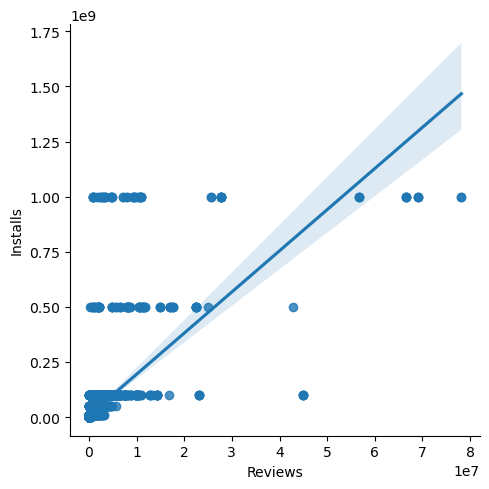

In [93]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize=(16, 6)) # make figure size
sns.lmplot(x='Reviews', y='Installs', data=df) # plot the scatter plot with trend line

- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.

---
## **Observation**
-We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.

- But wait, we have to check for the duplicates as well, as they can affect our analysis

## 2.3. **Duplicates**

* Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
* If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis. 
* Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points. 
* It is important to remove duplicates to ensure the accuracy and reliability of your data analysis.

In [94]:
# find duplicate if any
df.duplicated().sum()

483

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [95]:
# find duplicate if any in the 'App' column
df['App'].duplicated().sum()

1181

- Oops! we have 1181 dupicate app names
- Can we find a column which can help us to remove the duplicates?

let's check for number of duplicates in each column using a for loop and printing the output

In [96]:
# let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10796
Number of duplicates in Rating column are: 10784
Number of duplicates in Reviews column are: 4830
Number of duplicates in Size_in_bytes column are: 10373
Number of duplicates in Installs column are: 10809
Number of duplicates in Type column are: 10827
Number of duplicates in Price column are: 10737
Number of duplicates in Content Rating column are: 10823
Number of duplicates in Genres column are: 10710
Number of duplicates in Last Updated column are: 9453
Number of duplicates in Current Ver column are: 8046
Number of duplicates in Android Ver column are: 10796
Number of duplicates in Size_in_Mb column are: 10373
Number of duplicates in Installs_category column are: 10821


This means that the only better way to find duplicates is to check for whole data:

In [97]:
# print the number of duplicates in df
print(f"Number of duplicates in df are: {df.duplicated().sum()}")

Number of duplicates in df are: 483


- Find and watch all duplicates if they are real!

In [98]:
# find exact duplicates and print them
df[df['App'].duplicated(keep=False)].sort_values(by='App')

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,3.800000,High
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.000000,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,3.800000,High
2543,1800 Contacts - Lens Store,MEDICAL,4.700000,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,26.000000,High
2322,1800 Contacts - Lens Store,MEDICAL,4.700000,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,26.000000,High
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3984588.8,1000,Paid,16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up,3.800000,Low
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.400000,12,3984588.8,1000,Paid,16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up,3.800000,Low
1337,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,2-Aug-18,3.0.0,4.1 and up,15.000000,More than moderate
1434,21-Day Meditation Experience,HEALTH_AND_FITNESS,4.400000,11506,15728640.0,100000,Free,0.00,Everyone,Health & Fitness,2-Aug-18,3.0.0,4.1 and up,15.000000,More than moderate
3083,365Scores - Live Scores,SPORTS,4.600000,666521,26214400.0,10000000,Free,0.00,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up,25.000000,Very High
5415,365Scores - Live Scores,SPORTS,4.600000,666246,26214400.0,10000000,Free,0.00,Everyone,Sports,29-Jul-18,5.5.9,4.1 and up,25.000000,Very High


# Examples

<AxesSubplot: xlabel='Installs', ylabel='Price'>

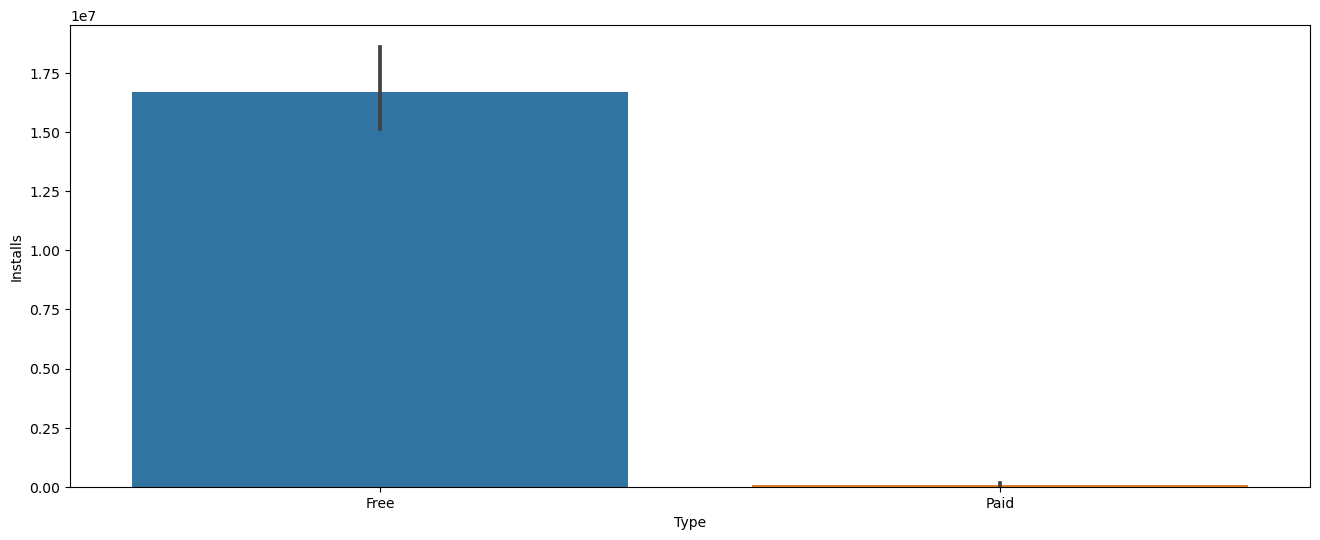

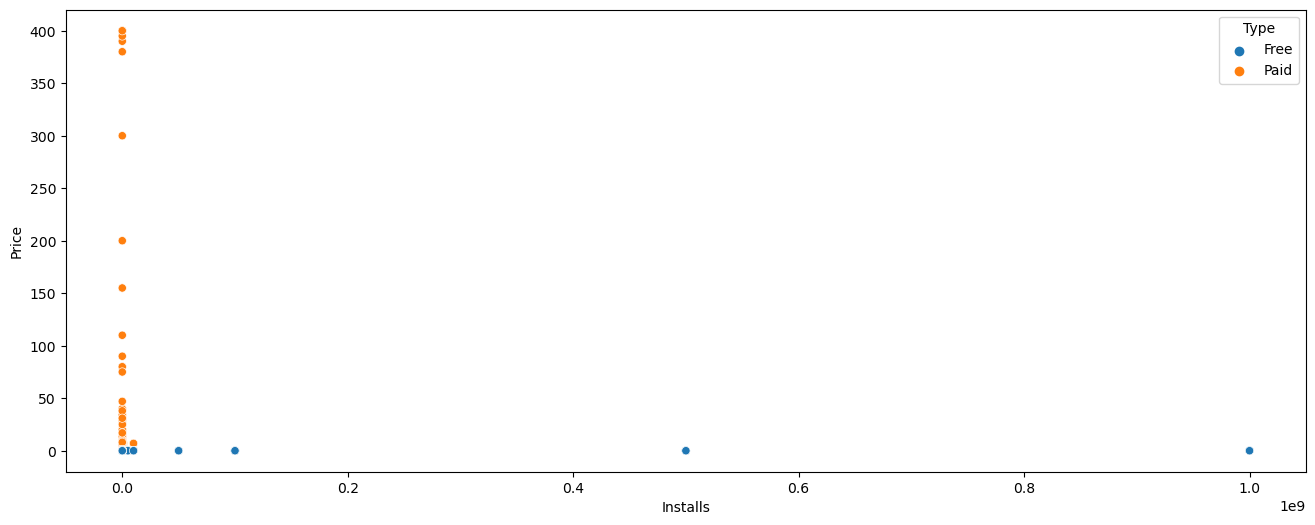

In [99]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Type', y='Installs', data=df) # plot the bar plot

# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize=(16, 6)) # make figure size
sns.scatterplot(x='Installs', y='Price', hue='Type', data=df) # plot the scatter plot

<AxesSubplot: xlabel='Installs_category', ylabel='Size_in_Mb'>

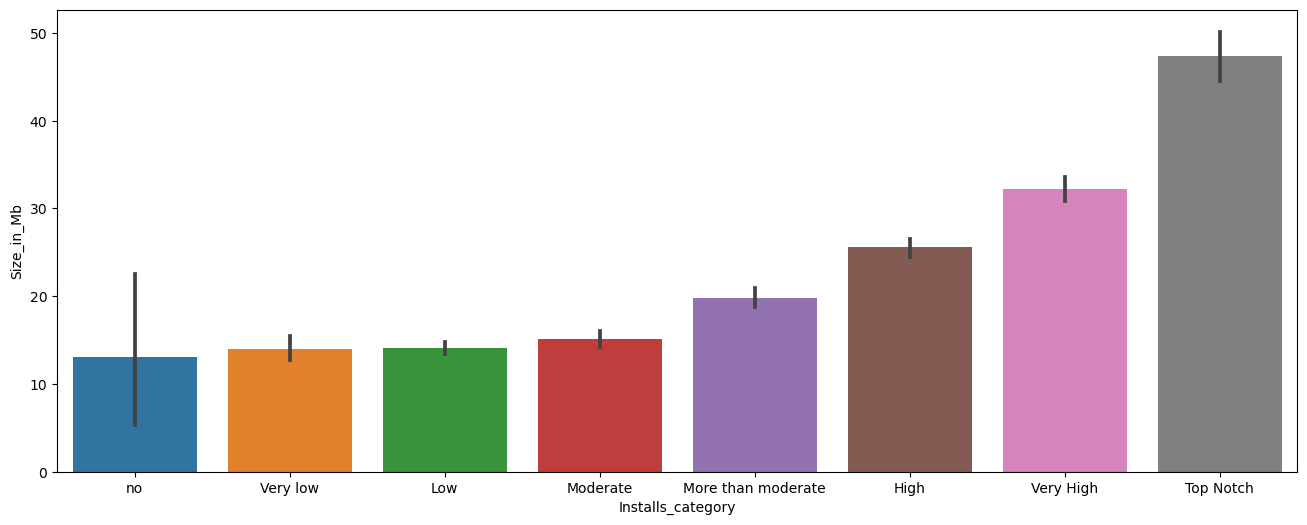

In [100]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Installs_category', y='Size_in_Mb', data=df) # plot the bar plot

In [101]:
# Which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Everyone           8704
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

<AxesSubplot: xlabel='Content Rating', ylabel='Installs'>

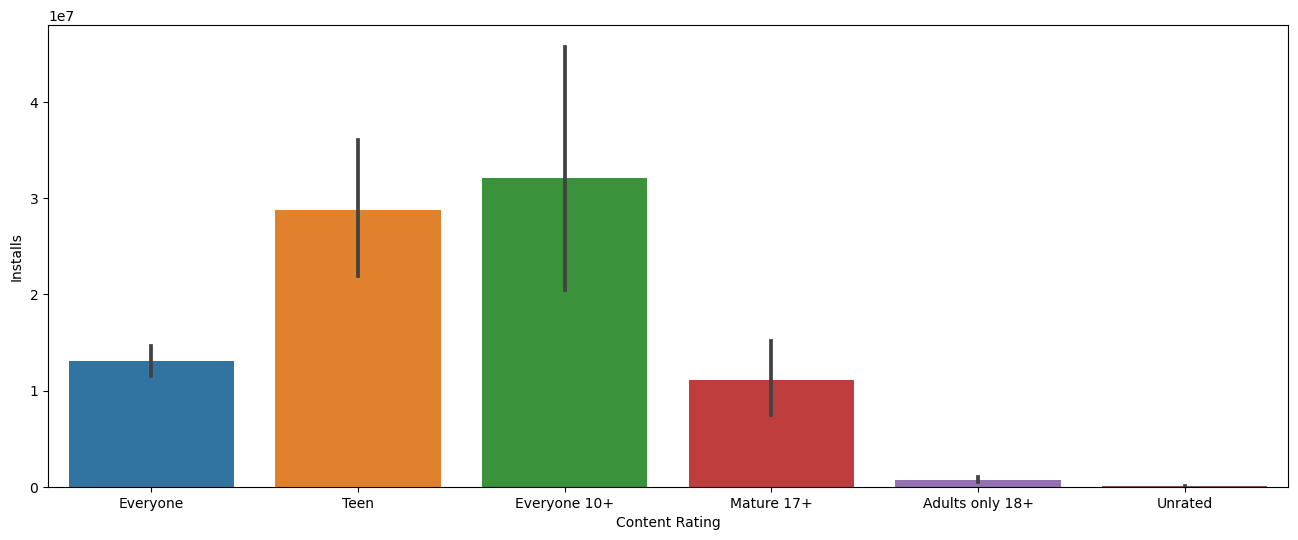

In [102]:
# plot the bar plot of Content Rating vs Installs
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='Content Rating', y='Installs', data=df) # plot the bar plot

In [103]:
# find how many apps are there in Everyone content rating
df['Category'].loc[df['Content Rating'] == 'Everyone'].value_counts()

FAMILY                 1526
TOOLS                   833
GAME                    608
BUSINESS                445
MEDICAL                 442
PRODUCTIVITY            413
FINANCE                 361
LIFESTYLE               345
COMMUNICATION           345
SPORTS                  338
PERSONALIZATION         320
PHOTOGRAPHY             318
HEALTH_AND_FITNESS      307
TRAVEL_AND_LOCAL        251
SHOPPING                208
BOOKS_AND_REFERENCE     201
NEWS_AND_MAGAZINES      169
VIDEO_PLAYERS           146
EDUCATION               144
MAPS_AND_NAVIGATION     133
FOOD_AND_DRINK          117
SOCIAL                  101
HOUSE_AND_HOME           86
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
WEATHER                  78
ART_AND_DESIGN           60
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            39
COMICS                   26
DATING                   21
Name: Category, dtype: int64

<AxesSubplot: xlabel='App', ylabel='Rating'>

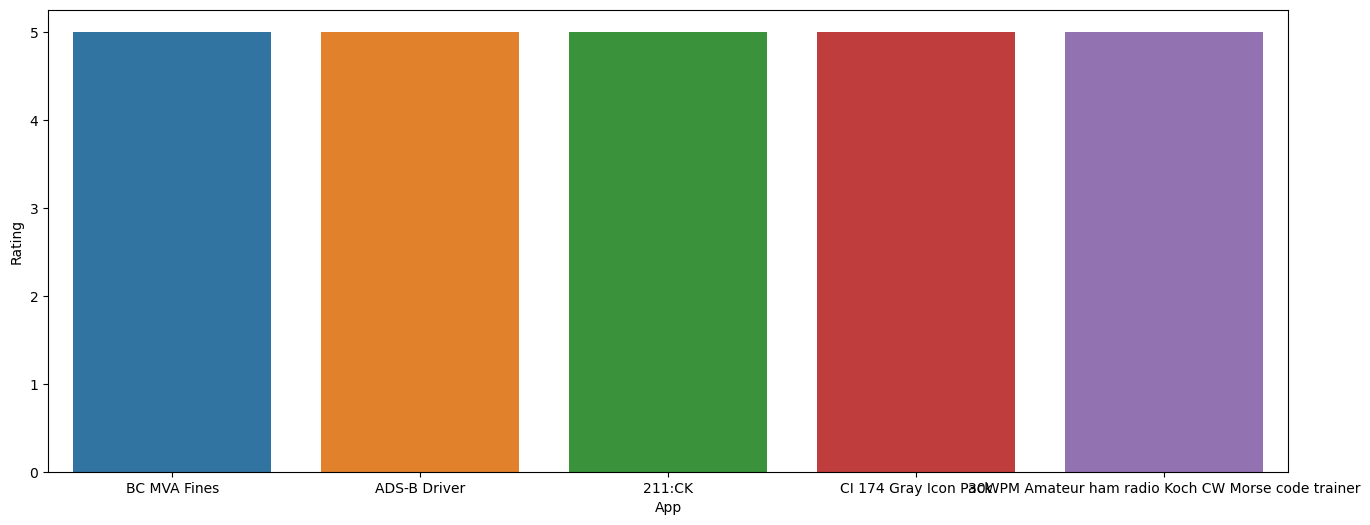

In [104]:
# plot top 5 rated paid apps
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [105]:
df[df['Type'] == 'Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
5966,BC MVA Fines,BOOKS_AND_REFERENCE,5.0,5,7549747.2,50,Paid,1.75,Everyone,Books & Reference,8-Oct-15,1,4.1 and up,7.2,Low
3957,ADS-B Driver,TOOLS,5.0,2,6606028.8,100,Paid,1.99,Everyone,Tools,15-May-18,1.19,4.4 and up,6.3,Low
7466,211:CK,GAME,5.0,8,39845888.0,10,Paid,0.99,Teen,Arcade,11-Apr-18,1.3,4.1 and up,38.0,Very low
7377,CI 174 Gray Icon Pack,PERSONALIZATION,5.0,1,48234496.0,10,Paid,0.99,Everyone,Personalization,21-May-18,1.1,4.1 and up,46.0,Very low
8018,30WPM Amateur ham radio Koch CW Morse code tra...,FAMILY,5.0,1,3879731.2,10,Paid,1.49,Everyone,Education,18-May-18,2.0.2,2.1 and up,3.7,Very low


<AxesSubplot: xlabel='App', ylabel='Rating'>

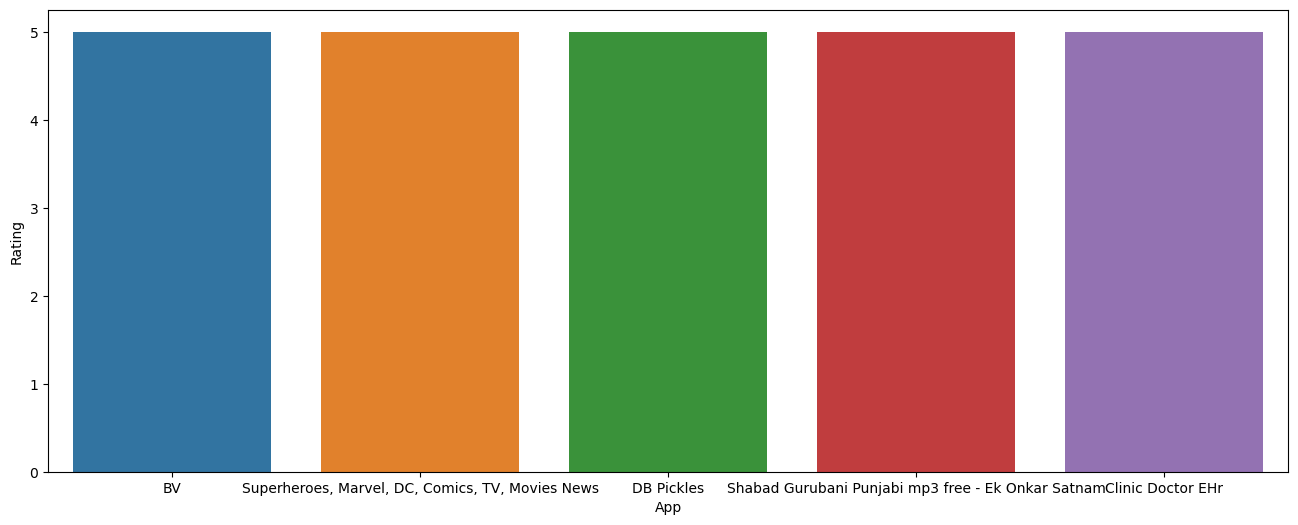

In [106]:
# plot top rated 5 apps in free category
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Rating', data=df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)) # plot the bar plot

In [107]:
df[df['Type'] == 'Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
6852,BV,COMMUNICATION,5.0,3,1677721.6,100,Free,0.0,Everyone,Communication,4-Aug-16,"1,01",3.0 and up,1.6,Low
8260,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,12582912.0,5000,Free,0.0,Everyone,Comics,31-Jul-18,1.0.5,5.0 and up,12.0,Moderate
8234,DB Pickles,BUSINESS,5.0,5,14680064.0,100,Free,0.0,Everyone,Business,20-Mar-18,2.0.2,4.1 and up,14.0,Low
9536,Shabad Gurubani Punjabi mp3 free - Ek Onkar Sa...,FAMILY,5.0,5,67108864.0,100,Free,0.0,Everyone,Entertainment,19-Jan-18,1.1,4.4 and up,64.0,Low
2484,Clinic Doctor EHr,MEDICAL,5.0,2,7444889.6,5,Free,0.0,Everyone,Medical,3-Aug-18,1.0.51.0.3,8.0 and up,7.1,Very low


<AxesSubplot: xlabel='App', ylabel='Reviews'>

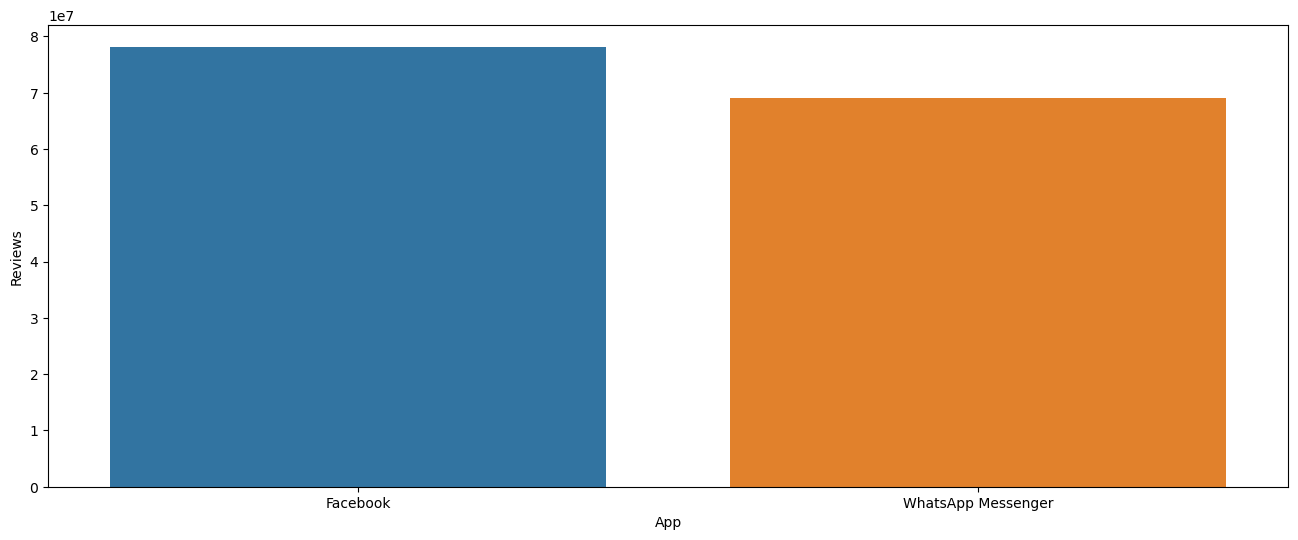

In [108]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

In [109]:
df[df['Type'] == 'Free'].sort_values(by='Reviews', ascending=False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
2544,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device,NaN,Top Notch
3943,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device,NaN,Top Notch
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device,NaN,Top Notch
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device,NaN,Top Notch
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device,NaN,Top Notch


<AxesSubplot: xlabel='App', ylabel='Reviews'>

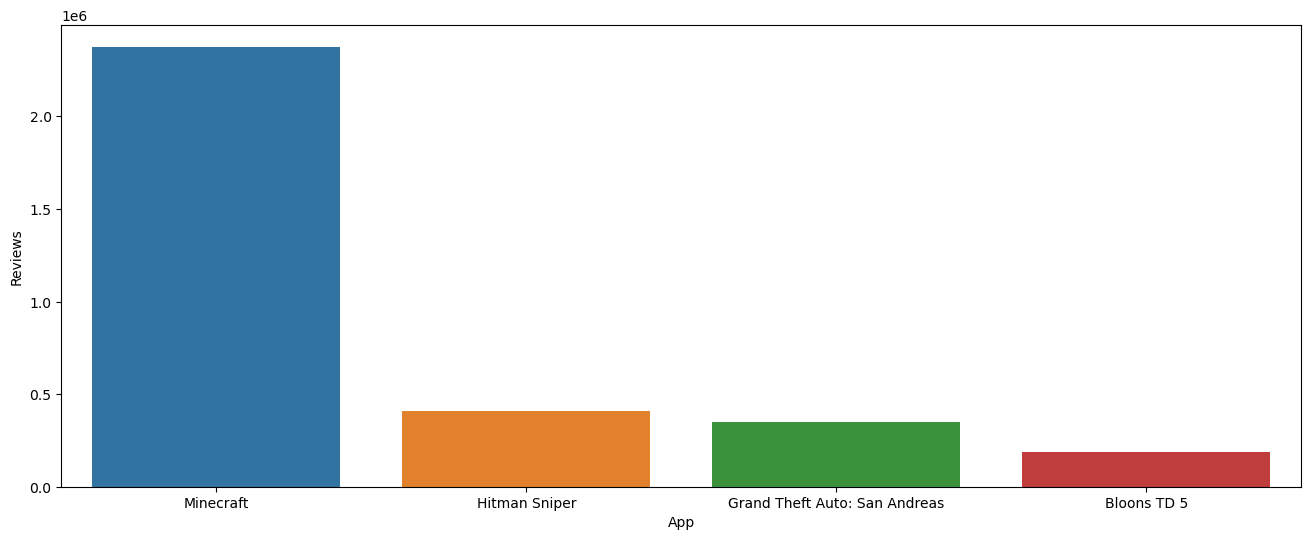

In [110]:
# Plot top 5 Paid apps with highest number of reviews
plt.figure(figsize=(16, 6)) # make figure size
sns.barplot(x='App', y='Reviews', data=df[df['Type'] == 'Paid'].sort_values(by='Reviews', ascending=False).head(5)) # plot the bar plot

-- Good Luck and Go Head!

---
- After Finishing this assignment, please make a complete project on one of the following Datasets:

# Google PlayStore Apps Big Data 
[Link to Download the data](https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps/data)

### Google PlayStore Android App Data. (2.3 Million+ App Data)

[Link Text](URL)


[Apple AppStore Apps dataset](https://www.kaggle.com/gauthamp10/apple-appstore-apps)
[Android App Permission dataset](https://www.kaggle.com/gauthamp10/app-permissions-android)


Also checkout:

### * Apple AppStore Apps dataset: [Link](https://www.kaggle.com/gauthamp10/apple-appstore-apps)
### * Android App Permission dataset: [Link](https://www.kaggle.com/gauthamp10/app-permissions-android)


To replace the missing values of 'Rating' with the respective average rating within each 'Installs_category,

In [111]:
# Calculate the average rating for each 'Installs_category'
average_ratings = df.groupby('Installs_category')['Rating'].mean()

# Fill missing 'Rating' values with the respective average within each 'Installs_category'
df['Rating'] = df.apply(lambda row: average_ratings[row['Installs_category']] if pd.isna(row['Rating']) else row['Rating'], axis=1)
